<a href="https://colab.research.google.com/github/Pushkarp26/Machine-Learning-of-energy-use-of-appliances-in-alow-energy-house/blob/main/TPOT_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Overview**
In this notebook, we are going to buils a model basd on parameters obtained from AutoML. The AutoML algorithm we are utilizing is known as TPOT.

##**So what is TPOT?**
>TPOT is meant to be an assistant that gives you ideas on how to solve a particular machine learning problem by exploring pipeline configurations that you might have never considered, then leaves the fine-tuning to more constrained parameter tuning techniques such as grid search.

So TPOT helps you find good algorithms.
TPOT is built on the scikit learn library and follows the scikit learn API closely. It can be used for regression and classification tasks and has special implementations for medical research.

##**Tasks performed in this notebook**
* Installing TPOT.
* Importing Libraries.
* Retrieving Data.
(We have pre-cleaned data from earlier analysis.)
* Splitting of Data into training and testing sets.
* Instantiating, fitting, and scoring the TPOT regressor.
* Creating the winning pipeline model on training set.
* Evaluating the model on test set.
* Atlast, checking the Accuracy of the model.


In [1]:
!pip install TPOT

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 163kB 6.8MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=6b7066e8749e3822ab63589a47fce251f976a441a92096512bacd089b1fda972
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
import sklearn.metrics
import timeit  

In [4]:
df = pd.read_csv("Data_1.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
X = pd.read_csv("predictor.csv")
X.drop("Unnamed: 0",axis=1,inplace=True)
y = pd.read_csv("target.csv")
y.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
print("df columns:\n {},\n\nX columns:\n {}".format(df.columns,X.columns))

df columns:
 Index(['Date', 'Appliances', 'lights', 'Kitchen_Temp', 'Kitchen_Humidity',
       'Living_room_Temp', 'Living_room_Humidity', 'Laundry_room Temp',
       'Laundry_room_Humidity', 'Office_Temp', 'Office_Humidity',
       'Bathroom_Temp', 'Bathroom_Humidity', 'Building_North_Temp',
       'Building_North_Humidity', 'Ironing_room_Temp',
       'Ironing _room_Humidity', 'Childrens_room_Temp',
       'Childrens_room_Humidity', 'Parents_room_Temp', 'Parents_room_Humidity',
       'Outside_Temp', 'Outside_Press', 'Outside_Humidity', 'Windspeed',
       'Visibility', 'Dewpoint_Temp', 'rv1', 'rv2', 'Total_Energy_Consumption',
       'Weekday', 'Weekstatus', 'Day_of_week', 'NSM'],
      dtype='object'),

X columns:
 Index(['Kitchen_Temp', 'Kitchen_Humidity', 'Living_room_Temp',
       'Living_room_Humidity', 'Laundry_room Temp', 'Laundry_room_Humidity',
       'Office_Temp', 'Office_Humidity', 'Bathroom_Temp', 'Bathroom_Humidity',
       'Building_North_Temp', 'Building_North_Humidi

In [6]:
X["Weekstatus"] = df[["Weekstatus"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kitchen_Temp             19735 non-null  float64
 1   Kitchen_Humidity         19735 non-null  float64
 2   Living_room_Temp         19735 non-null  float64
 3   Living_room_Humidity     19735 non-null  float64
 4   Laundry_room Temp        19735 non-null  float64
 5   Laundry_room_Humidity    19735 non-null  float64
 6   Office_Temp              19735 non-null  float64
 7   Office_Humidity          19735 non-null  float64
 8   Bathroom_Temp            19735 non-null  float64
 9   Bathroom_Humidity        19735 non-null  float64
 10  Building_North_Temp      19735 non-null  float64
 11  Building_North_Humidity  19735 non-null  float64
 12  Ironing_room_Temp        19735 non-null  float64
 13  Ironing _room_Humidity   19735 non-null  float64
 14  Childrens_room_Temp   

In [7]:
y.head()

,Total_Energy_Consumption
0,90
1,90
2,80
3,90
4,100


In [8]:
y_array = np.asarray(y)
y_array

array([[ 90],
       [ 90],
       [ 80],
       ...,
       [280],
       [430],
       [440]])

In [9]:
y_array = y_array.ravel()
y_array

array([ 90,  90,  80, ..., 280, 430, 440])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size = .25,
                                                    random_state = 33)
# instantiate tpot 
tpot = TPOTRegressor(verbosity=3,  
                      random_state=25, 
                      n_jobs=-1, 
                      generations=5, 
                      population_size=10,
                      early_stop = 5,
                      memory = None)
times = []
scores = []
winning_pipes = []

# run 3 iterations
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_ames.py')
# output results

times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

30 operators have been imported by TPOT.



Generation 1 - Current Pareto front scores:

-1	-6538.71383862177	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.9500000000000001, ExtraTreesRegressor__min_samples_leaf=19, ExtraTreesRegressor__min_samples_split=12, ExtraTreesRegressor__n_estimators=100)

Generation 2 - Current Pareto front scores:

-1	-6430.895909552353	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.6000000000000001, ExtraTreesRegressor__min_samples_leaf=8, ExtraTreesRegressor__min_samples_split=14, ExtraTreesRegressor__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..

Generation 3 - Current Pareto front scores:

-1	-6005.973532875204	RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.1, RandomForestRegressor__min_samples_leaf=8,


Generation 1 - Current Pareto front scores:

-1	-6538.71383862177	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.9500000000000001, ExtraTreesRegressor__min_samples_leaf=19, ExtraTreesRegressor__min_samples_split=12, ExtraTreesRegressor__n_estimators=100)

Generation 2 - Current Pareto front scores:

-1	-6430.895909552353	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.6000000000000001, ExtraTreesRegressor__min_samples_leaf=8, ExtraTreesRegressor__min_samples_split=14, ExtraTreesRegressor__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..

Generation 3 - Current Pareto front scores:

-1	-6005.973532875204	RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.1, RandomForestRegressor__min_samples_leaf=8,


Generation 1 - Current Pareto front scores:

-1	-6538.71383862177	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=False, ExtraTreesRegressor__max_features=0.9500000000000001, ExtraTreesRegressor__min_samples_leaf=19, ExtraTreesRegressor__min_samples_split=12, ExtraTreesRegressor__n_estimators=100)

Generation 2 - Current Pareto front scores:

-1	-6430.895909552353	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.6000000000000001, ExtraTreesRegressor__min_samples_leaf=8, ExtraTreesRegressor__min_samples_split=14, ExtraTreesRegressor__n_estimators=100)
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..

Generation 3 - Current Pareto front scores:

-1	-6005.973532875204	RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.1, RandomForestRegressor__min_samples_leaf=8,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size = .25,
                                                    random_state = 33)

In [12]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=None,
                                     max_features=0.9500000000000001,
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=5, min_samples_split=12,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=25,
                                     verbose=0, warm_start=False)

model.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features=0.9500000000000001,
                    max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=5, min_samples_split=12,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=25, verbose=0,
                    warm_start=False)

In [14]:
print("Accuracy Score for Train data: {}\n Accuracy Score for Test data: {}".
      format(model.score(X_train,y_train),model.score(X_test,y_test)))              

Accuracy Score for Train data: 0.7541904936292434
 Accuracy Score for Test data: 0.5653422085814563


In [70]:
yhat = model.predict(X_test)

In [67]:
Actual_values = pd.DataFrame(y_test,columns=['Actual Values'])
Actual_values.head()

,Actual Values
0,60
1,60
2,60
3,130
4,50


In [68]:
predicted_values = pd.DataFrame(yhat,columns=['Predicted Values'])
predicted_values.head()

,Predicted Values
0,66.702796
1,60.786190
2,51.172471
3,222.689996
4,53.608535


In [69]:
prediction = Actual_values.join(predicted_values)
prediction

,Actual Values,Predicted Values
0,60,66.702796
1,60,60.786190
2,60,51.172471
3,130,222.689996
4,50,53.608535
...,...,...
4929,40,61.857359
4930,50,41.155386
4931,60,49.059672
4932,80,79.108842


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

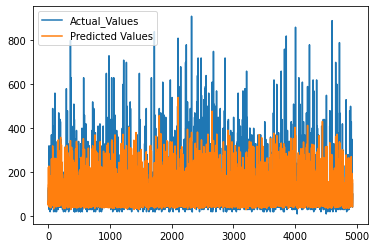

In [66]:
prediction.plot.line()